## Analyze stock prices on May 11th, 2021
In this analysis, we look at the highest "highs" and lowest "lows"of 10 stocks: 

- Facebook (FB)
- Shopify (SHOP)
- Beyond Meat (BYND)
- Netflix (NFLX)
- Pinterest (PINS)
- Square (SQ)
- The Trade Desk (TTD)
- Okta (OKTA)
- Snap (SNAP)
- Datadog (DDOG)


In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Read data queried from AWS Athena
res = pd.read_csv("results.csv")
res

,name,hour,highest_price
0,SHOP,3,1121.59
1,SHOP,1,1117.99
2,SHOP,2,1116.00
3,SHOP,11,1104.30
4,SHOP,12,1101.40
...,...,...,...
65,SNAP,1,52.67
66,SNAP,9,52.64
67,SNAP,10,52.63
68,SNAP,12,52.55


In [3]:
# Convert to army time
newhours = []
for i in res['hour']:
    i = str(i)
    if i == "1":
        i = "13"
    elif i == "2":
        i = "14"
    elif i == "3":
        i = "15"
    i = datetime.strptime(i,"%H")
    newhours.append(i.hour)
newhours
res['nhours'] = newhours
res.head()

,name,hour,highest_price,nhours
0,SHOP,3,1121.59,15
1,SHOP,1,1117.99,13
2,SHOP,2,1116.00,14
3,SHOP,11,1104.30,11
4,SHOP,12,1101.40,12


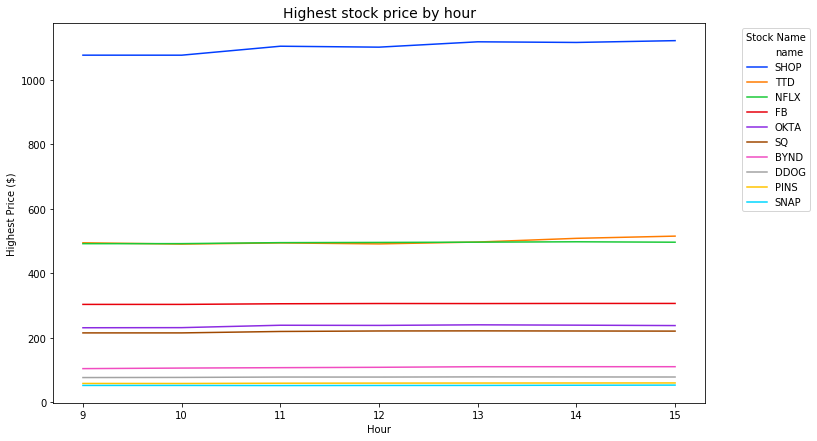

In [4]:
# Lineplot of the highest "high" by hour
plt.figure(figsize = (10,6))
sns.lineplot(x = 'nhours', y = 'highest_price', hue = 'name',
            data = res, palette = 'bright')
plt.tight_layout()
plt.legend(title = 'Stock Name',bbox_to_anchor = (1.05,1), loc = 2)
plt.title('Highest stock price by hour',fontsize = 14)
plt.xlabel("Hour")
plt.ylabel("Highest Price ($)")
plt.show()

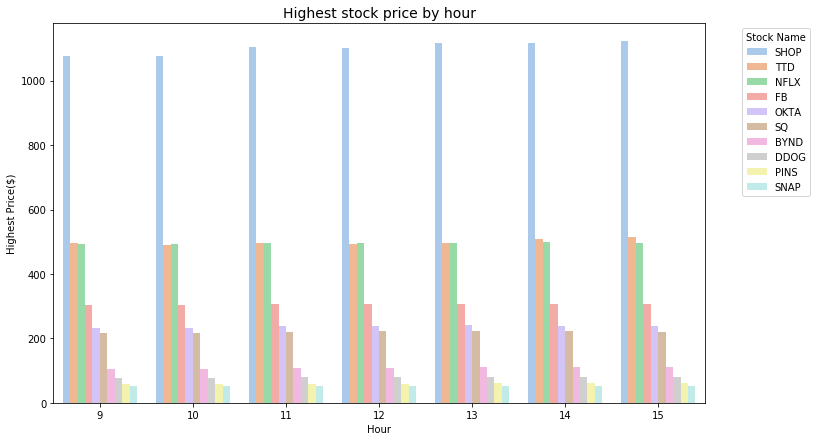

In [36]:
# Barplot of the highest "high" by hour
plt.figure(figsize = (10,6))
sns.barplot(x = 'nhours', y = 'highest_price', hue = 'name',
            data = res, palette = 'pastel')
plt.tight_layout()
plt.title('Highest stock price by hour',fontsize = 14)
plt.xlabel("Hour")
plt.ylabel("Highest Price($)")
plt.legend(title = 'Stock Name',bbox_to_anchor = (1.05,1), loc = 2)

SHOP stock price stayed the highest out of all stocks. SHOP and TTD increased towards the end of the day while others didn't fluctuate much

In [27]:
# Get the highest high by stock
df2 = res.groupby("name", as_index = False).agg({'highest_price':'mean'})
df2 = df2.rename(columns = {'highest_price':'price'})
df2['type'] = 'highest'
df2

,name,price,type
0,BYND,108.534286,highest
1,DDOG,78.347143,highest
2,FB,305.755714,highest
3,NFLX,495.310000,highest
4,OKTA,237.068571,highest
5,PINS,59.615714,highest
6,SHOP,1102.051429,highest
7,SNAP,52.808571,highest
8,SQ,219.520000,highest
9,TTD,499.014286,highest


In [28]:
# Get lowest low by stock data queried from Athena
df3 = pd.read_csv("result2.csv")
df3['type'] = 'lowest'
df3.columns = ['name','price','type']
df3

,name,price,type
0,NFLX,478.630005,lowest
1,SQ,205.690002,lowest
2,FB,299.769989,lowest
3,SHOP,1031.750000,lowest
4,PINS,55.602901,lowest
5,TTD,467.100006,lowest
6,BYND,100.818604,lowest
7,OKTA,218.550003,lowest
8,SNAP,50.139999,lowest
9,DDOG,73.040001,lowest


In [30]:
# Combine two dataframes
df4 = df2.append(df3)

Text(0, 0.5, 'Price ($)')

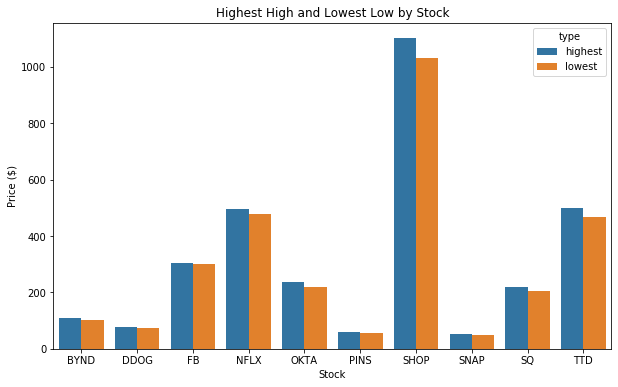

In [37]:
# Plot the highest high and lowest low by stock
plt.figure(figsize = (10,6))
sns.barplot(x = 'name', y = 'price', hue = 'type', data = df4)
plt.title("Highest High and Lowest Low by Stock")
plt.xlabel("Stock")
plt.ylabel("Price ($)")

The fluctuation between the highest and the lowest of SHOP is the largest then TTD and OKTA and SQ

The difference between the highest and the lowest is the lowest in SNAP, PINS, DDOG, FB, BYND